# Miniproject Kevin Jetten

# Describe the data  
The name of the dataset is “Diabetes 130-US hospitals for years 1999-2008 Data Set”. It contains 101767 records of hospital admissions about people with diabetes. It contains 55 attributes but not all the attributes are available for all of the records. It is very clear that the domain of this dataset is medical.  
  
I would like to use supervised machine learning to predict the amount of days a patient is likely to stay in the hospital based on the other attributes. I think the most useful attributes for this prediction are: age, weight, admission type and admission source but I am certain there will be other attributes that are very important in predicting this which I will find out about by making all kinds of different plots.  
  
It’s not necessary to clean the dataset, however because there are records that have missing attributes I have to determine the importance of these attributes after I made the plots. Then I can decide what to do with the missing data. Because there are so many records the best choice might be to remove the records from which the crucial attributes are missing.
  
The dataset can be found at the following link:  
[Link to the dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00296/)


# Exploring the data

In [1]:
import pandas as pd

dataset_location = "..\ML\Miniproject\dataset_diabetes\diabetic_data.csv"
data = pd.read_csv(dataset_location)

# I also remove the '20' records, there are only three and I expect they should be 200+ but I cant be certain.
data = data[~data.weight.isin(["20"])]
data = data[data.gender.isin(["Male", "Female"])]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101763 non-null int64
patient_nbr                 101763 non-null int64
race                        101763 non-null object
gender                      101763 non-null object
age                         101763 non-null object
weight                      101763 non-null object
admission_type_id           101763 non-null int64
discharge_disposition_id    101763 non-null int64
admission_source_id         101763 non-null int64
time_in_hospital            101763 non-null int64
payer_code                  101763 non-null object
medical_specialty           101763 non-null object
num_lab_procedures          101763 non-null int64
num_procedures              101763 non-null int64
num_medications             101763 non-null int64
number_outpatient           101763 non-null int64
number_emergency            101763 non-null int64
number_inpatient            10176

## Faulty records  
While exploring the data by playing with it and making some very basic plots I found some faulty records. There are about 3 records with their weight set on ‘20’ while every other person which has their weight filled in has it put in a category like ‘25-50’. I suspect that these people should be in ‘200+’ but I can’t know for sure. Because there are only so few of these I decided to remove them from the dataset.  

There were also a few records in which the gender was unknown, I will again remove these because they are not useful in any way and would only confuse the machine learning algorithm.


## Plots about the data

I will now make some plots about the data. The plots will be used to determine which machine learning algorithm will be used. There are way too many features to all put the in one decent scatter plot, this is why I will filter the data and make multiple plots.  
Not every record has certain attributes, like weight, I will first determine the importance of these. This was I can make thought out decisions about the cleaning and usage of the data

### General patient information
These first few plots will be based on basic and general information about the patient

In [2]:
common_info_frame = pd.DataFrame({'encounter_id': data['encounter_id'],'age': data['age'], 'gender': data['gender'], 'weight': data['weight'],
                                  'time_in_hospital': data['time_in_hospital']})

common_info_frame['age'] = common_info_frame['age'].apply(lambda x: x[1:-1])
common_info_frame['weight'] = common_info_frame['weight'].apply(lambda x: x[1:-1])
common_info_frame.head(5)



,age,encounter_id,gender,time_in_hospital,weight
0,0-10,2278392,Female,1,
1,10-20,149190,Female,3,
2,20-30,64410,Female,2,
3,30-40,500364,Male,2,
4,40-50,16680,Male,1,


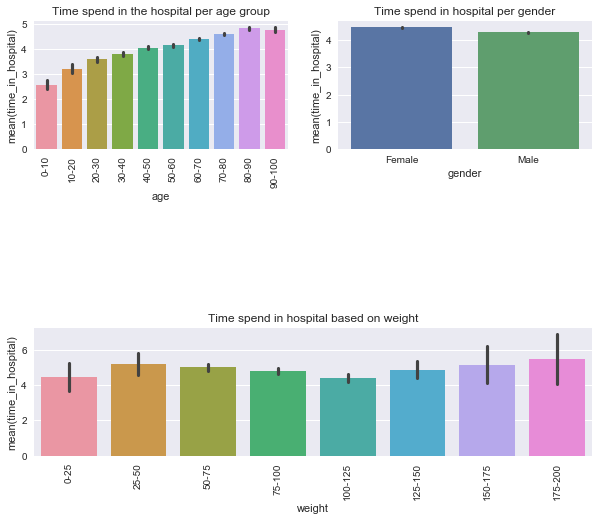

In [3]:
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib 

matplotlib.rcParams['figure.figsize'] = 10,8

# Create 3x2 sub plots
gs = gridspec.GridSpec(3, 2)
pl.figure()
ax1 = pl.subplot(gs[0, 0])  # row 0, col 0
ax2 = pl.subplot(gs[0, 1])  # row 0, col 1
ax3 = pl.subplot(gs[2, :])  # row 1, span all columns

# First plot (from left to right) is about the average time spend in the hospital grouped by their age group.
sns.barplot('age',  # Horizontal axis
            'time_in_hospital',  # Vertical axis
            data=common_info_frame,  # Data source
            ax=ax1,
            order=["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"]
            )
ax1.set_title('Time spend in the hospital per age group')
for label in ax1.get_xticklabels():
    label.set_rotation(90)

# The second plot is about the average time spend in the hospital grouped by gender.
sns.barplot('gender',  # Horizontal axis
            'time_in_hospital',  # Vertical axis
            data=common_info_frame,  # Data source
            ax=ax2,
            )
ax2.set_title('Time spend in hospital per gender')

# The third plot is about the average time spend in the hospital grouped by how much the patient weighs.
sns.barplot('weight',  # Horizontal axis
            'time_in_hospital',  # Vertical axis
            data=common_info_frame,  # Data source
            ax=ax3,
            order=["0-25", "25-50", "50-75", "75-100", "100-125", "125-150", "150-175", "175-200"]
            )
ax3.set_title('Time spend in hospital based on weight')
for label in ax3.get_xticklabels():
    label.set_rotation(90)

plt.show()


<b>Age</b>  
The difference between the first and the second group is the biggest but the others are still consistently climbing up over time. You could roughly draw a line that goes upward connecting all of the bars.  

<b>Weight</b>  
Most notable are the last two weight groups in which the records jump out the most. Even though there seems to be some sort of correlation, I don’t want to make the weight field an requirement and remove the records that have it empty. Reason being that there are only 3000 entries where weight is filled in while there are otherwise 100k and it doesn’t seem to be overwhelmingly important. 

### Medicine  
I’ve made plots for all the medicines (22 different kinds). It is hard for me to say something meaningful about this because I have no clue what these medicines do, but there seem to be a correlation with the stay period.  

There might also be a correlation with the stay period and a certain combination of medicines but I could not think of a proper way to plot this and find out. However, machine learning should be able to catch these correlations if they exist.


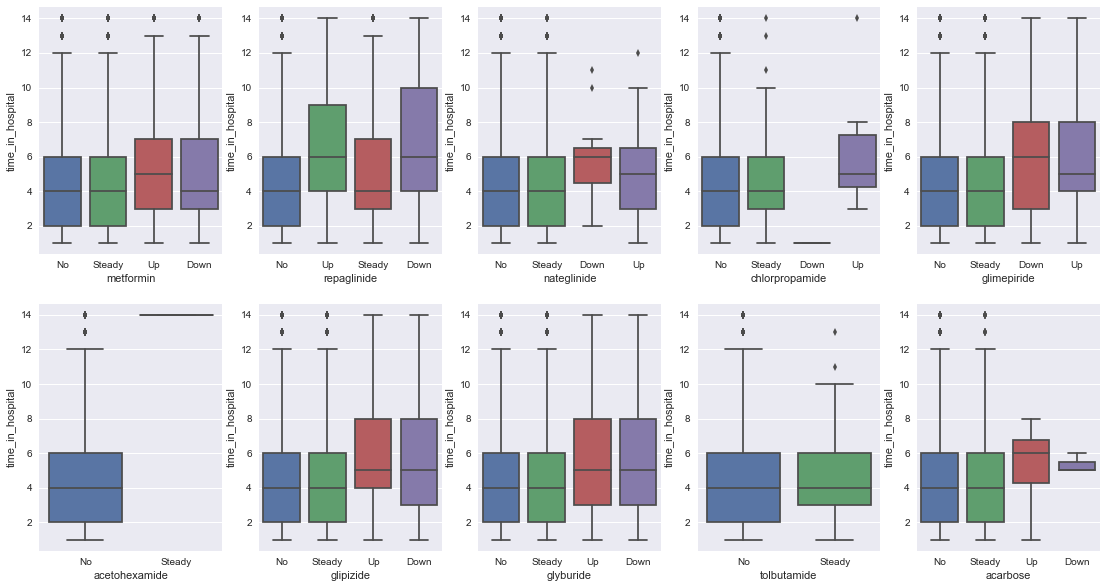

In [4]:
import matplotlib 
matplotlib.rcParams['figure.figsize'] = 19,10

first_group_medicine = pd.DataFrame(
    {'encounter_id': data['encounter_id'], 'time_in_hospital': data['time_in_hospital'], 'metformin': data['metformin'],
     'repaglinide': data['repaglinide'],
     'nateglinide': data['nateglinide'], 'chlorpropamide': data['chlorpropamide'], 'glimepiride': data['glimepiride'],
     'acetohexamide': data['acetohexamide'], 'glipizide': data['glipizide'], 'glyburide': data['glyburide'],
     'tolbutamide': data['tolbutamide'], 'pioglitazone': data['pioglitazone'], 'rosiglitazone': data['rosiglitazone'],
     'acarbose': data['acarbose']
     })
gs = gridspec.GridSpec(2, 5)

pl.figure()
ax1 = pl.subplot(gs[0, 0])  
ax2 = pl.subplot(gs[0, 1])  
ax3 = pl.subplot(gs[0, 2]) 
ax4 = pl.subplot(gs[0, 3])  
ax5 = pl.subplot(gs[0, 4])  
ax6 = pl.subplot(gs[1, 0]) 
ax7 = pl.subplot(gs[1, 1])  
ax8 = pl.subplot(gs[1, 2])  
ax9 = pl.subplot(gs[1, 3])  
ax10 = pl.subplot(gs[1, 4])  

sns.boxplot(x="metformin", y="time_in_hospital", data=first_group_medicine, ax=ax1)
sns.boxplot(x="repaglinide", y="time_in_hospital", data=first_group_medicine, ax=ax2)
sns.boxplot(x="nateglinide", y="time_in_hospital", data=first_group_medicine, ax=ax3)
sns.boxplot(x="chlorpropamide", y="time_in_hospital", data=first_group_medicine, ax=ax4)
sns.boxplot(x="glimepiride", y="time_in_hospital", data=first_group_medicine, ax=ax5)
sns.boxplot(x="acetohexamide", y="time_in_hospital", data=first_group_medicine, ax=ax6)
sns.boxplot(x="glipizide", y="time_in_hospital", data=first_group_medicine, ax=ax7)
sns.boxplot(x="glyburide", y="time_in_hospital", data=first_group_medicine, ax=ax8)
sns.boxplot(x="tolbutamide", y="time_in_hospital", data=first_group_medicine, ax=ax9)
sns.boxplot(x="acarbose", y="time_in_hospital", data=first_group_medicine, ax=ax10)

plt.show()


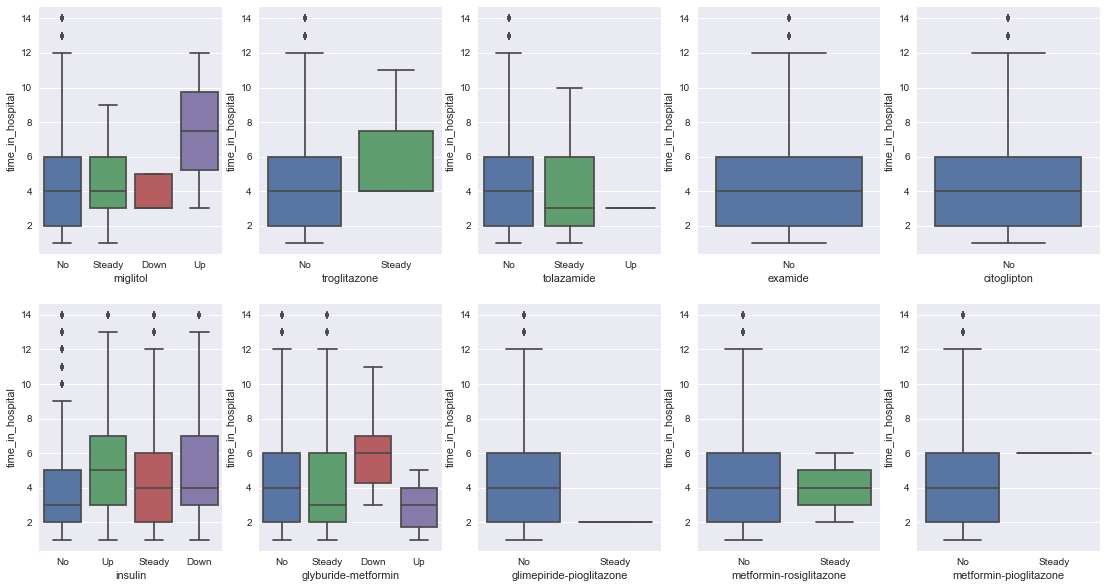

In [5]:
matplotlib.rcParams['figure.figsize'] = 19,10
second_group_medicine = pd.DataFrame(
    {'time_in_hospital': data['time_in_hospital'], 'miglitol': data['miglitol'], 'troglitazone': data['troglitazone'],
     'tolazamide': data['tolazamide'],
     'examide': data['examide'], 'citoglipton': data['citoglipton'], 'insulin': data['insulin'],
     'glyburide-metformin': data['glyburide-metformin'], 'glipizide-metformin': data['glipizide-metformin'],
     'glimepiride-pioglitazone': data['glimepiride-pioglitazone'],
     'metformin-rosiglitazone': data['metformin-rosiglitazone'],
     'metformin-pioglitazone': data['metformin-pioglitazone'] })

gs = gridspec.GridSpec(2, 5)

pl.figure()
ax1 = pl.subplot(gs[0, 0])  
ax2 = pl.subplot(gs[0, 1])  
ax3 = pl.subplot(gs[0, 2]) 
ax4 = pl.subplot(gs[0, 3])  
ax5 = pl.subplot(gs[0, 4])  
ax6 = pl.subplot(gs[1, 0]) 
ax7 = pl.subplot(gs[1, 1])  
ax8 = pl.subplot(gs[1, 2])  
ax9 = pl.subplot(gs[1, 3])  
ax10 = pl.subplot(gs[1, 4])  

sns.boxplot(x="miglitol", y="time_in_hospital", data=second_group_medicine, ax=ax1)
sns.boxplot(x="troglitazone", y="time_in_hospital", data=second_group_medicine, ax=ax2)
sns.boxplot(x="tolazamide", y="time_in_hospital", data=second_group_medicine, ax=ax3)
sns.boxplot(x="examide", y="time_in_hospital", data=second_group_medicine, ax=ax4)
sns.boxplot(x="citoglipton", y="time_in_hospital", data=second_group_medicine, ax=ax5)
sns.boxplot(x="insulin", y="time_in_hospital", data=second_group_medicine, ax=ax6)
sns.boxplot(x="glyburide-metformin", y="time_in_hospital", data=second_group_medicine, ax=ax7)
sns.boxplot(x="glimepiride-pioglitazone", y="time_in_hospital", data=second_group_medicine, ax=ax8)
sns.boxplot(x="metformin-rosiglitazone", y="time_in_hospital", data=second_group_medicine, ax=ax9)
sns.boxplot(x="metformin-pioglitazone", y="time_in_hospital", data=second_group_medicine, ax=ax10)

plt.show()

### Hospital information  
There is some information left in the dataset doesn't fall under the categories from above. I've chosen to name them "Hospital information".

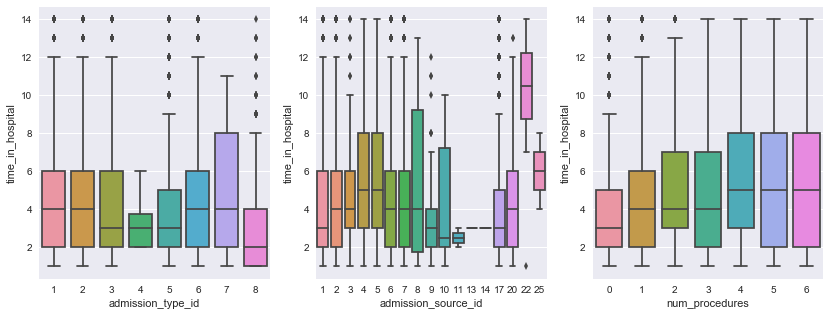

In [6]:
matplotlib.rcParams['figure.figsize'] = 19,5
admissions = pd.DataFrame({'admission_type_id': data['admission_type_id'],
                                      'admission_source_id': data['admission_source_id'],
                                      'num_lab_procedures': data['num_lab_procedures'],
                                      'num_procedures': data['num_procedures'],
                                      'num_medications': data['num_medications'],
                                      'number_outpatient': data['number_outpatient'],
                                      'number_emergency': data['number_emergency'],
                                      'number_inpatient': data['number_inpatient'],
                                      'number_diagnoses': data['number_diagnoses'],
                                     'time_in_hospital':data['time_in_hospital']})

gs = gridspec.GridSpec(1, 4)

pl.figure()
ax1 = pl.subplot(gs[0, 0])  
ax2 = pl.subplot(gs[0, 1])  
ax3 = pl.subplot(gs[0, 2]) 

sns.boxplot(x="admission_type_id", y="time_in_hospital", data=admissions, ax=ax1)
sns.boxplot(x="admission_source_id", y="time_in_hospital", data=admissions, ax=ax2)
sns.boxplot(x="num_procedures", y="time_in_hospital", data=admissions, ax=ax3)

plt.show()

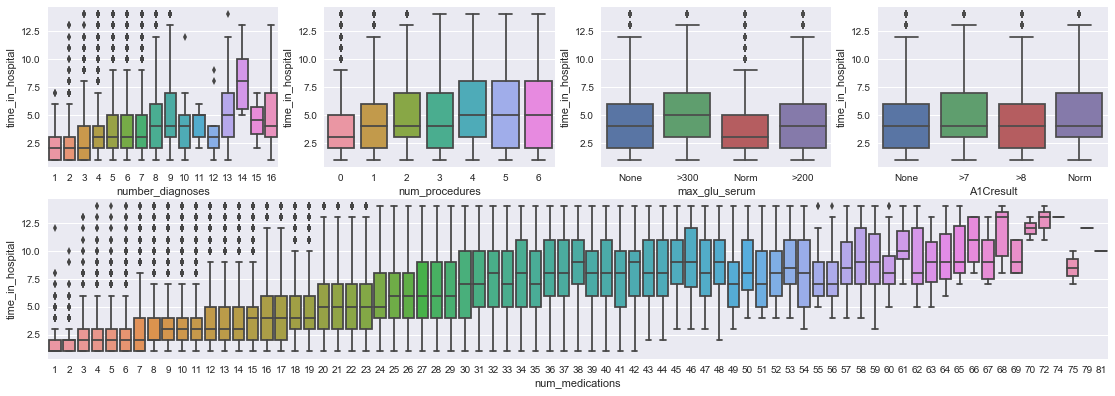

In [53]:
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = 19,10

number_cases = pd.DataFrame(
    {'number_diagnoses': data['number_diagnoses'], 
     'num_procedures': data['num_procedures'], 
     'max_glu_serum': data['max_glu_serum'], 
     'A1Cresult': data['A1Cresult'], 
     'discharge_disposition_id': data['discharge_disposition_id'], 
     'num_medications': data['num_medications'], 
     'time_in_hospital': data['time_in_hospital']})
gs = gridspec.GridSpec(3, 4)

pl.figure()
ax1 = pl.subplot(gs[0, 0])
ax2 = pl.subplot(gs[0, 1])
ax3 = pl.subplot(gs[0, 2])
ax4 = pl.subplot(gs[0, 3])
ax5 = pl.subplot(gs[1, :])

sns.boxplot(x="number_diagnoses", y="time_in_hospital", data=number_cases, ax=ax1)
sns.boxplot(x="num_procedures", y="time_in_hospital", data=number_cases, ax=ax2)
sns.boxplot(x="max_glu_serum", y="time_in_hospital", data=number_cases, ax=ax3)
sns.boxplot(x="A1Cresult", y="time_in_hospital", data=number_cases, ax=ax4)
sns.boxplot(x="num_medications", y="time_in_hospital", data=number_cases, ax=ax5)

plt.show()


<b>Admission source</b>  
A few of the admission sources stand out compared to the rest. Let’s take id 22 as example, the description states that this group is transferred from the hospital in which the patient already had stayed overnight. It’s quite a safe bet that they are going to stay even more days in the hospital in this case.  
  
<b>Number of medications taken</b>  
The last graph I want to talk about this also the largest one, the amount of different medicines a patient uses. The correlation between these two fields is very obvious and you don’t have to be a doctor to get a feeling on why this can be the case.

<b>Initial conclusion </b>  
I would like to draw some initial conclusions from the graphs that I talked about in this chapter. First of all that the older you are the longer your stay will probably be. Also some medication will impact your stay duration more than others and some medicine won’t have an impact at all. The number of medications you are on will have a very big impact, the more medications you are on the longer you will stay in the hospital.

# Do the Analysis  
I would first like to think about what in theory would be the best algorithm. There are some key questions I can answer about the data and what I want to predict now which can help me choose what algorithm to use.  
 •	I have more than 100k samples but not by that many  
•	A lot of features can be important  
•	It’s textual data  
•	It’s labeled but it’s not totally clear which features are important  

The top algorithms I have to look at based on these points are:  
1.	Decision Tree
2.	Mini batch K-means 
3.	SGD Classification


## Machine learning  
First of I will prepare the dataset which will be used for the different kinds of machine learning algorithms. Values that are not numbers but which are needed for the process I will convert.  
  
After talking to Peter Lambooij about the preciseness of the prediction (which first was between 1 and 14 days) I decided to reduce this period to two different kinds of stays: less than one week and more than one week. I also played around with clustering days in smaller groups (like 1 to 3 days, 3 to 6 days, etc.) and these can be found in the preparing of the dataset down below. This way they can be easily swapped around to see how the algorithms cope with them and what results they give.

In [8]:
import numpy as np
# Created a method to easily transform all string columns to numeric
def series_to_numeric(serie):
    values = serie.unique()
    mapping = {}
    for value_number in np.arange(0,len(values)):
        mapping[values[value_number]]= value_number
    return mapping


In [9]:
dataset = data[~data.weight.isin(["20"])]
dataset = dataset[dataset.gender.isin(["Male", "Female"])]

x = pd.DataFrame({
    'num_medications': dataset['num_medications'],
    'number_diagnoses': dataset['number_diagnoses'],
    'num_procedures': dataset['num_procedures'],
    'repaglinide': dataset['repaglinide'].replace(series_to_numeric(dataset['repaglinide'])),
    #'discharge_disposition_id': dataset['discharge_disposition_id'].replace(series_to_numeric(dataset['discharge_disposition_id'])),
    'glipizide': dataset['glipizide'].replace(series_to_numeric(dataset['glipizide'])),
})

# Sorting the time_in_hospital in 2 categories: 1-7, 8-14 days
dic = {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2}

# Sorting the time_in_hospital in 3 categories: 1-5, 6-10, 11-14 days
#dic = {1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 3, 7: 4, 8: 4, 9: 5, 10:5, 11: 6, 12: 6, 13: 7, 14: 7}

# Sorting the time_in_hospital in 4 categories: 1-4, 5-8, 9-12, 13-14 days
#dic = {1: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2, 8: 2, 9: 3, 10:3, 11: 3, 12: 3, 13: 4, 14: 4}

# Sorting the time_in_hospital in 5 categories: 1-3, 4-6, 7-9, 10-12, 13-14 days
#dic = {1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 3, 8: 3, 9: 3, 10:4, 11: 4, 12: 4, 13: 5, 14: 5}

dataset['time_in_hospital'] = dataset['time_in_hospital'].replace(dic)
y = dataset['time_in_hospital']

### Decision Tree  
First of all I want to take a look at a decision tree. I think you can really create a mental picture in which you put these features in a tree which makes it easy to understand why this algorithm would work.  
By applying a cross-validation to the dataset we can validate that the classifier has not been overfit.

In [20]:
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

clf1_tree = tree.DecisionTreeClassifier(max_features=5,max_depth=10, min_samples_leaf=20)

x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(x, y, test_size=0.25, random_state=2)

cv_tree = KFold(len(y_train_tree), 5, shuffle=True, random_state=0)

scores_tree = cross_val_score(clf1_tree, x_train_tree, y_train_tree, cv=cv_tree)

print(scores_tree)
print("Mean score: {0:.3f} (+/-{1:.3f})".format(
    np.mean(scores_tree), sem(scores_tree)))


[ 0.85928595  0.85699312  0.85357704  0.85835954  0.85763889]
Mean score: 0.857 (+/-0.001)


In [11]:
from sklearn import metrics

clf1_tree.fit(x_train_tree, y_train_tree)

y_pred_tree = clf1_tree.predict(x_test_tree)
print(metrics.classification_report(y_test_tree, y_pred_tree.astype(int)))


             precision    recall  f1-score   support

          1       0.87      0.98      0.92     21608
          2       0.56      0.14      0.23      3833

avg / total       0.82      0.85      0.81     25441



While you can maybe argue that the recall score is more important than the precision in this case I am confliced about it. The recall value is based on all true positives and the false negatives found. However I am more interested in the cases wherein a patient is predicted to stay less than one week but actually having to stay more, precision say much more about this making it more important in my opinion. "The precision is intuitively the ability of the classifier not to label as positive a sample that is negative."

### Mini batch K-means
Mini batch K-means is a way of clustering large quantities of data. It is a variant of the KMeans algorithm but it uses mini-batches to reduce the computation time. The mini-batches drastically reduce the amount of computation required which makes it great for datasets with more than 100k samples.  

Before deciding to drastically reduce the prediction outcome (from 14 days to more or less than 1 week) it was extremely unlikely that clustering would have worked because there would be 14 seemingly indistinguishable clusters. Now there will only be two possibilities which makes way more sense for a clustering solution.

In [12]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cross_validation import train_test_split
from scipy.stats import sem

# Important: When changing the time_in_hospital clustering you have to change n_clusters to the amount of clusters there are set.
reg_kmeans = MiniBatchKMeans(n_clusters=2,random_state=0, n_init=10, max_no_improvement=100)

x_train_kmeans, x_test_kmeans, y_train_kmeans, y_test_kmeans = train_test_split(x, y, test_size=0.25, random_state=2)



In [13]:
from sklearn import metrics

reg_kmeans.fit(x_train_kmeans, y_train_kmeans)
y_pred_kmeans = reg_kmeans.predict(x_test_kmeans)

print(metrics.classification_report(y_test_kmeans, y_pred_kmeans.astype(int)))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.68      0.22      0.33     21608
          2       0.00      0.00      0.00      3833

avg / total       0.58      0.18      0.28     25441



C:\Users\Uber-Laptop\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Uber-Laptop\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Looking at this metrics it seems like that the clustering was not able to properly find two clusters. The relatively high precision could be because there are only two groups so unless the learning process really has gone wrong any accuracy around 50% wouldn't be surprising

### Classification 
As last algorithm I wanted to implement a classification algorithm. I was doubting between using Linear SVC and the SGD Classifier, SVC should be used when having less than 100k samples. I have around 100k samples so I decided to try them both because it was only changing one simple line.  

Very quickly, or rather very slowly, I noticed the difference. The SGD classifier was able to train with the given data within seconds while the SVC took minutes for roughly the same result.

#### SGD Classifier

In [14]:
from sklearn.linear_model import SGDClassifier

classifier_sgd = SGDClassifier(random_state=0)

x_train_sgd, x_test_sgd, y_train_sgd, y_test_sgd = train_test_split(x, y, test_size=0.25, random_state=2)

cv_sgd = KFold(len(y_train_sgd), 5, shuffle=True, random_state=0)

scores_sgd = cross_val_score(classifier_sgd, x_train_sgd, y_train_sgd, cv=cv_sgd)

print(scores_sgd)
print("Mean score: {0:.3f} (+/-{1:.3f})".format(
    np.mean(scores_sgd), sem(scores_sgd)))

[ 0.75892565  0.66131674  0.84728774  0.79494235  0.83772275]
Mean score: 0.780 (+/-0.034)


In [15]:
classifier_sgd.fit(x_train_sgd, y_train_sgd)
y_pred_sgd = classifier_sgd.predict(x_test_sgd)

print(metrics.classification_report(y_test_sgd, y_pred_sgd.astype(int)))

             precision    recall  f1-score   support

          1       0.90      0.88      0.89     21608
          2       0.38      0.42      0.40      3833

avg / total       0.82      0.81      0.81     25441



#### SVC Classifier

In [16]:
from sklearn import svm

classifier_SVC = svm.SVC()

x_train_SVC, x_test_SVC, y_train_SVC, y_test_SVC = train_test_split(x, y, test_size=0.25, random_state=2)

cv_SVC = KFold(len(y_train_SVC), 5, shuffle=True, random_state=0)

scores_SVC = cross_val_score(classifier_SVC, x_train_SVC, y_train_SVC, cv=cv_SVC)

print(scores_SVC)
print("Mean score: {0:.3f} (+/-{1:.3f})".format(
    np.mean(scores_SVC), sem(scores_SVC)))


[ 0.85987553  0.85784474  0.85587002  0.85855608  0.85757338]
Mean score: 0.858 (+/-0.001)


In [17]:
classifier_SVC.fit(x_train_SVC, y_train_SVC)
y_pred_SVC = classifier_SVC.predict(x_test_SVC)

print(metrics.classification_report(y_test_SVC, y_pred_SVC.astype(int)))

             precision    recall  f1-score   support

          1       0.87      0.98      0.92     21608
          2       0.59      0.14      0.22      3833

avg / total       0.82      0.86      0.82     25441



While I initially thought that the decision tree would beat the other algorithms by miles I was very surprised that this was not the case. Only the cluster algorithm isn't as sucessful.  
Because I picked the algorithms based on some well thought out attributes the difference between the algorithms isn’t as big as if I would just randomly pick some from previously made exercises.  

# Ensemble learning  
I will use the already trained classifiers to create a table filled with the results of all the algorithms. After this I can take the majority-vote of each prediction and put this in the metrics classification too see if I get a better performance.

In [18]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

ensemble_table = pd.DataFrame(columns={'DecisionTree', 'Kmeans', 'SGD'})

for index, row in x_test.iterrows():
    dt_pred = clf1_tree.predict(row)
    kmean_pred = reg_kmeans.predict(row)
    if kmean_pred[0] == 0:
        kmean_pred[0] = 1
    else:
        kmean_pred[0] = 2
    sgd_pred = classifier_sgd.predict(row)
    ensemble_table.loc[index] = [dt_pred[0], kmean_pred[0], sgd_pred[0]]


# Mode chooses the most common number for each row in the dataframe
mode = ensemble_table.mode(axis=1)
# Change the dataframe to an array and cast the floats to ints so they are ready for metrics classification 
ensemble_prediction = mode[0].as_matrix().astype(int)
# Print the classification report of the ensemble prediction
print(metrics.classification_report(y_test, ensemble_prediction))


             precision    recall  f1-score   support

          1       0.90      0.88      0.89     21608
          2       0.39      0.42      0.40      3833

avg / total       0.82      0.81      0.82     25441



I find it remarkable that the ensemble learning is as good as both of the best algorithms but isn't pulled down by the MiniBatchKMeans.  

Because the exercise showed a table in which the different kinds of algorithms were put next to each other I would like to do that too.

In [19]:
ensemble_report = pd.DataFrame(columns={'DecisionTree', 'Kmeans', 'SGD', 'Ensemble_pred', 'Label'})
# Rearranging the order 
ensemble_report = ensemble_report[['DecisionTree', 'Kmeans', 'SGD', 'Ensemble_pred', 'Label']]
ensemble_report['DecisionTree'] = ensemble_table['DecisionTree']
ensemble_report['Kmeans'] = ensemble_table['Kmeans']
ensemble_report['Ensemble_pred'] = ensemble_prediction
ensemble_report['SGD'] = ensemble_table['SGD']
ensemble_report['Label'] = y_test

ensemble_report.head(10)



,DecisionTree,Kmeans,SGD,Ensemble_pred,Label
94185,1,1,1,1,1
76073,2,2,1,2,2
74898,1,2,1,1,1
61859,2,2,1,2,2
42321,1,1,1,1,2
23668,1,1,1,1,1
53355,1,1,1,1,1
69604,1,1,1,1,1
91148,1,1,1,1,1
93002,1,1,1,1,1


# Final words
Looking back on this mini project I learned that it is way harder to precisely predict something even though you have enormous amounts of data. I also found it harder than expected to plot my data in such way that it had had value and that it would tell something meaningful.  

I think it would be very interesting to see how this dataset would perform on a neural network. This because there is a lot of medicine involved which can have a lot of different correlations between each other, these correlations have their own weight and this would fit well within a neural network.  

The ensemble report, in this case, is a great way to get a balanced outcome between precision and recall. While the decision tree was able to get a high precision and recall rate in the first category it had a very bad recall rate in the second category compared to the SGD classifier. Depending on the situation one of these three solutions could be chosen.

While Peter did a great job in class explaining everything about true positives and such I used the following websites to refresh my memory when I was in doubt about the confusion metrics : [link](https://medium.com/@klintcho/explaining-precision-and-recall-c770eb9c69e9)  

